# Sharing visualizations with others

## Preparing your figures to share with others

In [11]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ticker = yf.Tickers(['^GSPC','^IXIC'])
vol_data = ticker.history(start="2023-01-01", end="2023-12-31")['Volume']

[*********************100%***********************]  2 of 2 completed


In [3]:
vol_data.rename(columns={"^GSPC": "S&P 500", "^IXIC": "NASDAQ"}, inplace = True)

In [4]:
vol_data.head()

,S&P 500,NASDAQ
Date,,
2023-01-03,3959140000,4780650000
2023-01-04,4414080000,5085380000
2023-01-05,3893450000,4764270000
2023-01-06,3923560000,5199780000
2023-01-09,4311770000,5132190000


In [7]:
m_data = vol_data.groupby(by=[vol_data.index.month, vol_data.index.year]).agg([np.mean, np.std])

In [8]:
m_data.index.get_level_values(0)

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int32', name='Date')

Style Guidelines

[style sheets reference](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)

- Dark backgrounds are usually less visible 

- If color is important, consider choosing color blind-friendly options "seaborn-colorblind" or "tableau-colorblind10"

- If you think that someone will want to print your figure, use less ink

- If it will be printed in black-and-white,use the "grayscale" style.

([<matplotlib.axis.XTick at 0x11eae5ad0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12')])

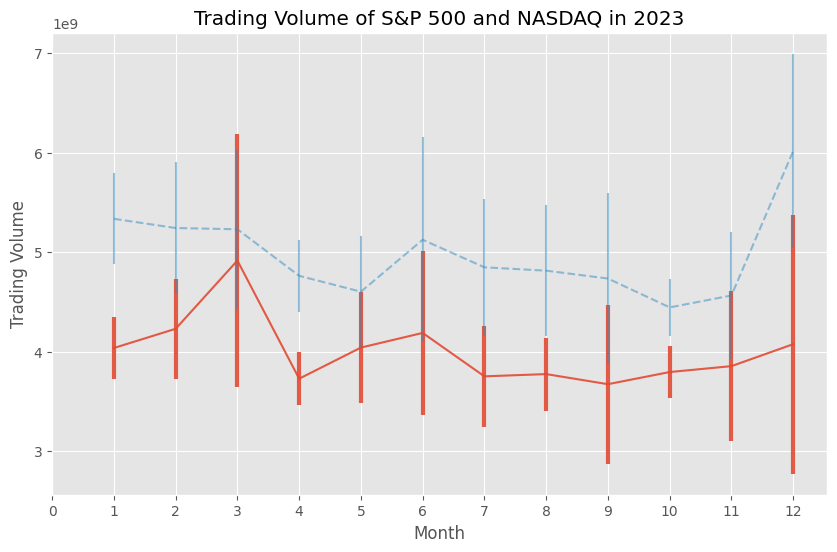

In [15]:
# change style
# plt.style.use('default')
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10,6))
ax.errorbar(m_data.index.get_level_values(0), 
            m_data['S&P 500']['mean'],
            yerr = m_data['S&P 500']['std'],
            alpha = 0.9,
            elinewidth = 3
           )

ax.errorbar(m_data.index.get_level_values(0), 
            m_data['NASDAQ']['mean'],
            yerr = m_data['NASDAQ']['std'],
            alpha = 0.5,
            linestyle='--'
           )

ax.set_xlabel('Month')
ax.set_ylabel('Trading Volume')

ax.set_title('Trading Volume of S&P 500 and NASDAQ in 2023')

plt.xticks(np.arange(0, 13, 1))

## Saving your visualizations

In [26]:
data = np.random.normal(50, 8, (200,1))

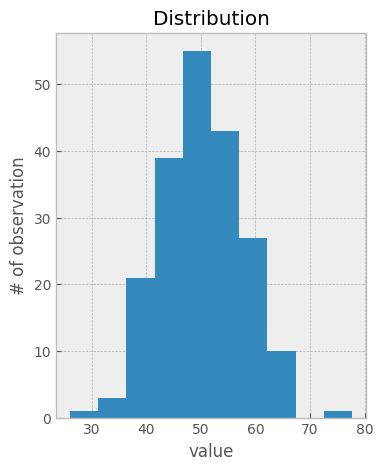

In [47]:
plt.style.use('bmh')
fig, ax = plt.subplots()

ax.hist(data)

ax.set_xlabel('value')
ax.set_ylabel('# of observation')

ax.set_title('Distribution')

# save fig
# fig.savefig('Distribution Plot.png')
# fig.savefig('Distribution Plot.jpg')
# fig.savefig('Distribution Plot_dpijpg', dpi = 300)
# fig.savefig('Distribution Plot_medium.jpg', quality = 30)
# fig.savefig('Distribution Plot_svg.svg')

fig.savefig('Distribution Plot.jpg', dpi = 200)

# set figure size
fig.set_size_inches([4,5])

fig.savefig('Distribution Plot_45.jpg', dpi = 200)

